## Outline
1. Import libraries and explore data
2. Check for missing values
3. Explore features by xgb feature importance
4. Explore features by correlation
5. Select features
6. Run various algos
7. Stacking/Ensemble

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb


/Users/chelimin/miniconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/chelimin/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
train_df = pd.read_csv("train.csv")
train_df.shape

(30471, 292)

In [4]:
macro_df = pd.read_csv("macro.csv")
macro_df.shape


(2484, 100)

In [5]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [8]:
macro_df.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [12]:
#merging training data with macro data

all_df = pd.merge(macro_df, train_df)
all_df.shape

(30471, 391)

In [16]:
all_df.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,2011-08-20,109.31,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,29.0048,...,9,4,0,13,22,1,0,52,4,5850000
1,2011-08-23,109.31,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.9525,...,15,3,0,15,29,1,10,66,14,6000000
2,2011-08-27,109.31,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.8082,...,10,3,0,11,27,0,4,67,10,5700000
3,2011-09-01,111.29,14313.7,3.3,353.2,434.4,86.721,15.386,10.1,28.9655,...,11,2,1,4,4,0,0,26,3,13100000
4,2011-09-05,111.29,14313.7,3.3,353.2,434.4,86.721,15.386,10.1,29.4625,...,319,108,17,135,236,2,91,195,14,16331452


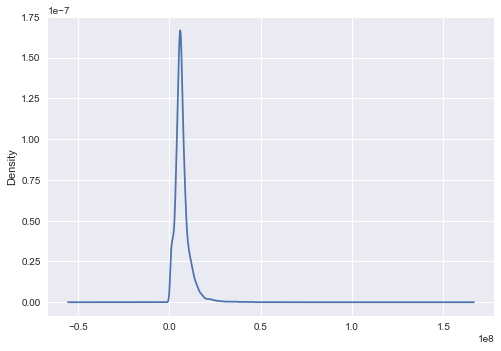

In [49]:
#exploring the label distribution

all_df.price_doc.plot(kind='density')

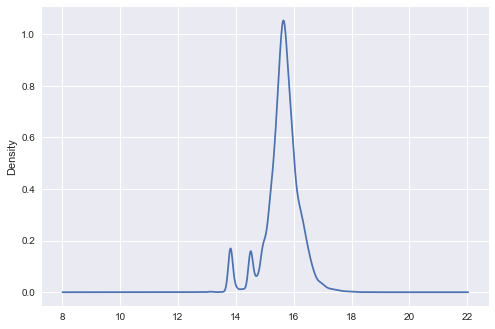

In [50]:
#log the labels to get rid of the long right tail 

all_df['price_log'] = np.log(all_df['price_doc'])
all_df.price_log.plot(kind='density')

### Missing values

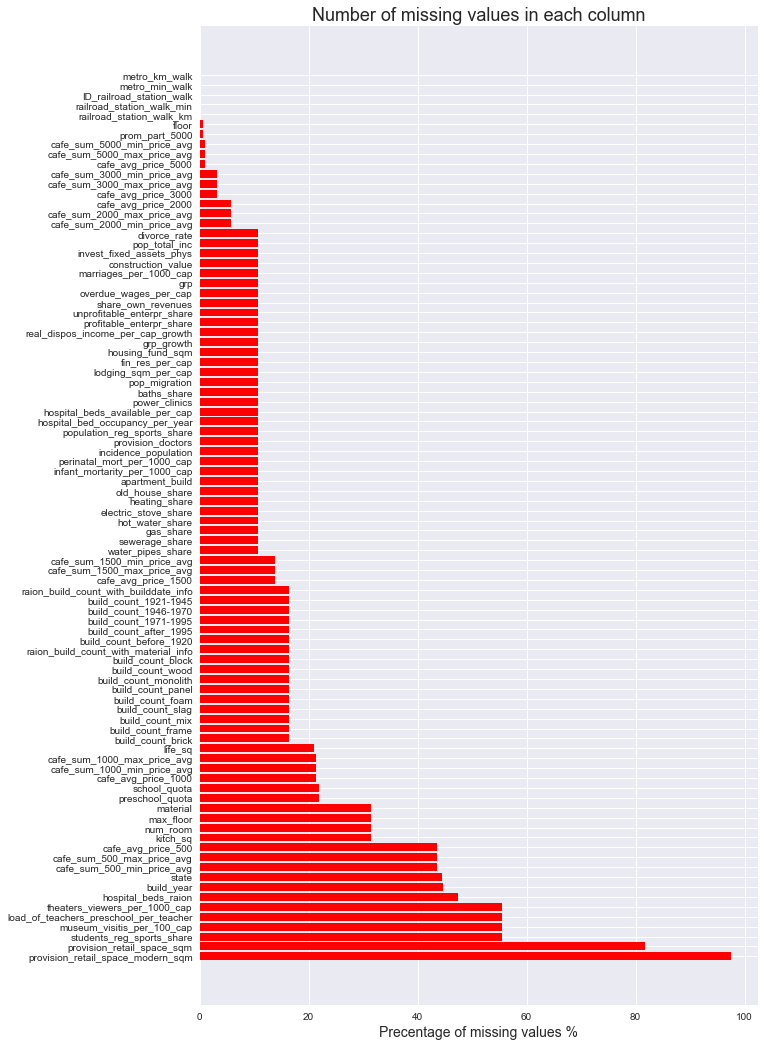

In [51]:
missing = all_df.isnull().sum(0).reset_index()
missing.columns = ['column', 'count']
missing = missing.sort_values(by = 'count', ascending = False).loc[missing['count'] > 0]
missing['percentage'] = missing['count'] / float(all_df.shape[0]) * 100
ind = np.arange(missing.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,18))
rects = ax.barh(ind, missing.percentage.values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(missing.column.values, rotation='horizontal')
ax.set_xlabel("Precentage of missing values %", fontsize = 14)
ax.set_title("Number of missing values in each column", fontsize = 18)
plt.show()

In [52]:
#drop features with more than 20% missing values

delete_col = missing.loc[missing['percentage'] >= 20].column.values
train_set = all_df.drop(delete_col, axis=1)


In [62]:
train_set.shape

#22 columns dropped

(30471, 370)

### Feature importance with XGB

In [53]:
#train with xgb to get feature importance

train_y = train_set.price_log.values
train_X = train_set.drop(["id", "timestamp", "price_doc"], axis=1)
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 50

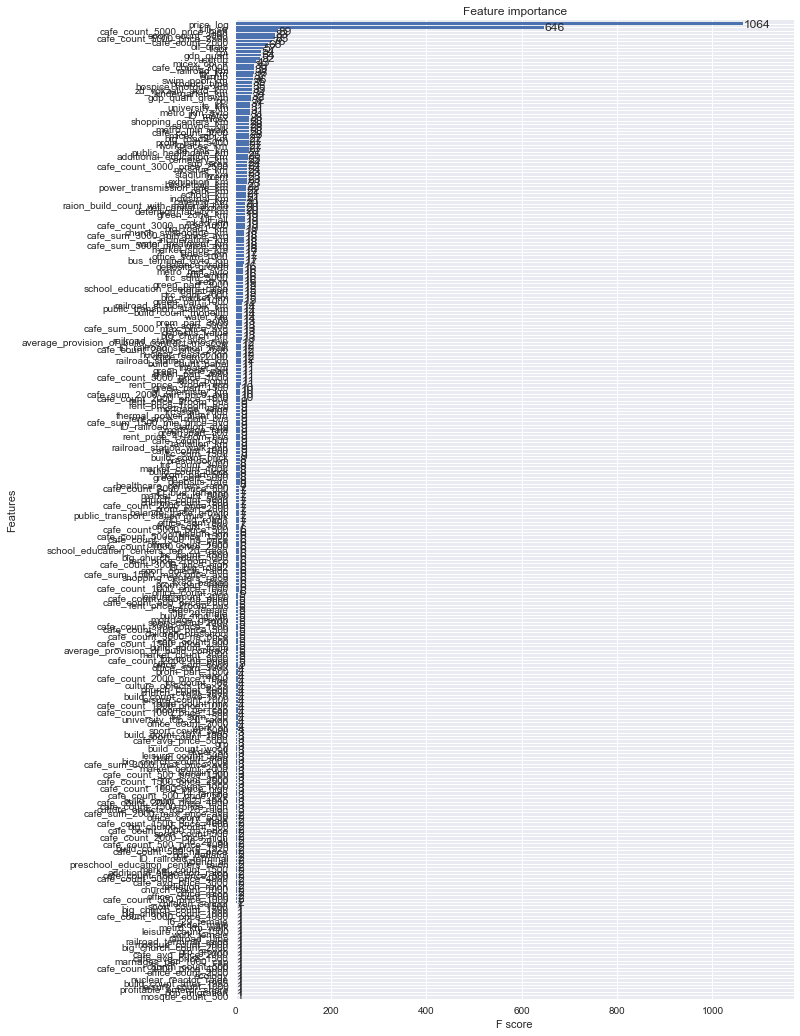

In [54]:
fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model,height=0.8, ax=ax)
plt.show()

In [55]:
#Get top 50 important features

importance = model.get_score(importance_type='weight')
tuples = sorted([(k, importance[k]) for k in importance], key=lambda x: x[1], reverse=True)[:remain_num]
xgb_imp_f = [x[0] for x in tuples]
print xgb_imp_f

['price_log', 'full_sq', 'cafe_count_5000_price_high', 'cafe_count_5000_price_2500', 'sport_count_3000', 'cafe_count_2000', 'oil_urals', 'floor', 'gdp_quart', 'cpi', 'usdrub', 'micex_cbi_tr', 'railroad_km', 'cafe_count_3000', 'ttk_km', 'eurrub', 'swim_pool_km', 'zd_vokzaly_avto_km', 'hospice_morgue_km', 'product_type', 'kindergarten_km', 'ppi', 'gdp_quart_growth', 'ID_metro', 'metro_km_avto', 'university_km', 'ts_km', 'micex_rgbi_tr', 'cafe_count_5000', 'metro_min_walk', 'sadovoe_km', 'shopping_centers_km', 'micex', 'public_healthcare_km', 'ice_rink_km', 'workplaces_km', 'prom_part_5000', 'big_road2_km', 'cemetery_km', 'additional_education_km', 'mosque_km', 'cafe_count_3000_price_2500', 'sub_area', 'basketball_km', 'exhibition_km', 'brent', 'stadium_km', 'park_km', 'power_transmission_line_km', 'catering_km']


In [65]:
for f in train_set.columns:
    if train_set[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_set[f].values)) 
        train_set[f] = lbl.transform(list(train_set[f].values))
dtype_df = train_set.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,178
1,float64,192


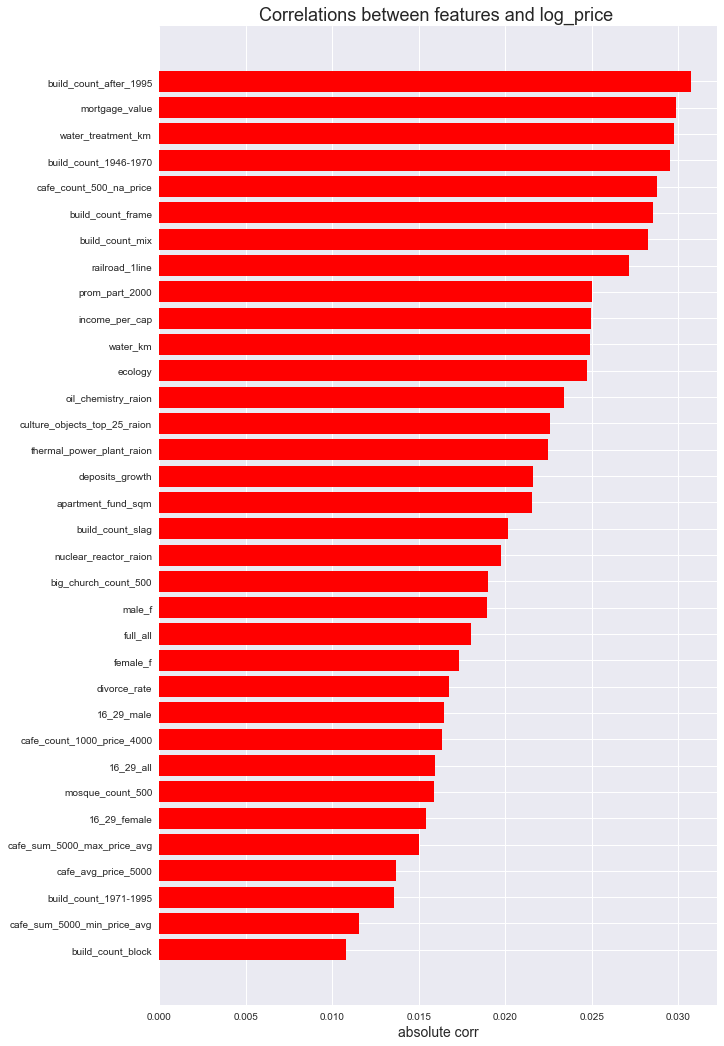

In [67]:
corrmat = train_set.drop(["id", "timestamp", "price_doc"], axis=1).corr(method='pearson', min_periods=1000)
corrmat = np.abs(corrmat)

remain_num = 50
corr_target = corrmat['price_log'].reset_index()[:-2]
corr_target.columns = ['feature','abs_corr']
corr_target = corr_target.sort_values(by = 'abs_corr', ascending = True)[:remain_num].loc[corr_target['abs_corr'] >0.01]
ind = np.arange(corr_target.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,18))
rects = ax.barh(ind, corr_target.abs_corr.values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(corr_target.feature.values, rotation='horizontal')
ax.set_xlabel("absolute corr", fontsize = 14)
ax.set_title("Correlations between features and log_price ", fontsize = 18)
plt.show()

In [71]:
corr_target_f = list(corr_target.feature.values)

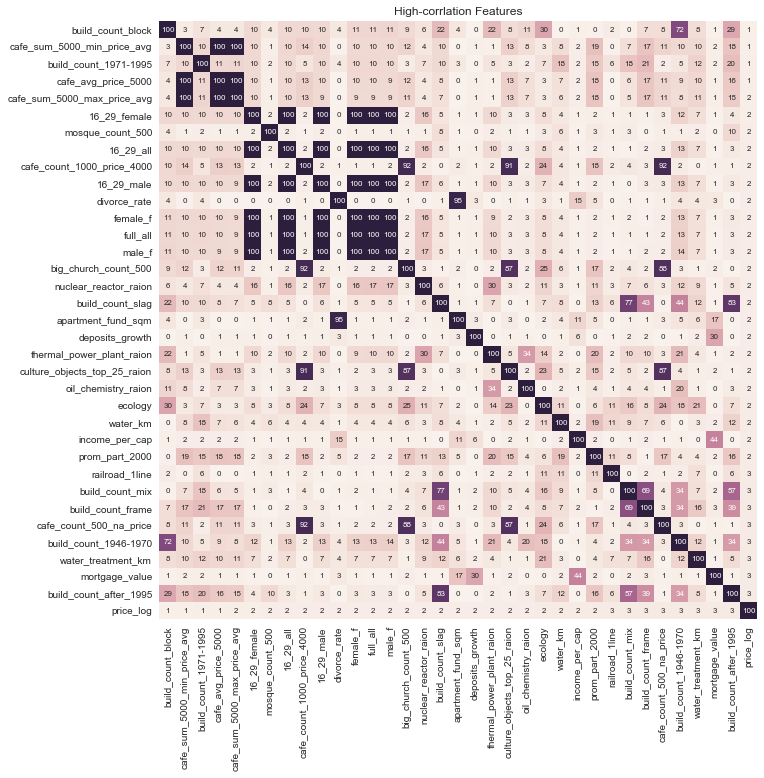

In [72]:
corr_target_f2 = corr_target_f
corr_target_f2.append('price_log')
high_corr = train_set[corr_target_f2].corr(method='pearson', min_periods=1000)
high_corr = np.abs(high_corr)*100
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(high_corr, cbar=False, annot=True, square=True, fmt='.0f', 
            annot_kws={'size': 8})
plt.title('High-corrlation Features')
plt.show()


In [73]:
#delete duplicate features

remove_list = ['cafe_sum_5000_max_price_avg','16_29_male', 'female_f','full_all', 'male_f']
corr_target_f = [x for x in corr_target_f if x not in remove_list]

### Combining correlation and xgb features

In [74]:
total_f = list(set(xgb_imp_f) | set(corr_target_f))
common_f = list(set(xgb_imp_f) & set(corr_target_f))
xgb_top_f = xgb_imp_f[:10]
corr_top_f = corr_target_f[:10]
print('there are {} features chosen in total'.format(len(total_f)))
print('there are {} features chosen in common'.format(len(common_f)))

there are 79 features chosen in total
there are 1 features chosen in common


### Normalize and impute missing values

In [77]:
imputer = preprocessing.Imputer(missing_values='NaN', strategy = 'median', axis =0, verbose=0, copy=True)
imputer.fit(train_set[total_f])

#impute
train_data = pd.DataFrame(imputer.transform(train_set[total_f]), columns=total_f)
#normalize
train_data = pd.DataFrame(preprocessing.normalize(train_data, axis =0, copy=True, return_norm=False), columns = total_f)

In [86]:
train_data.shape

(30471, 79)

### Train test split data

In [84]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import make_pipeline

/Users/chelimin/miniconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [85]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [95]:
x_train = train_data.drop('price_log', axis=1)
y_train=train_data.price_log

In [96]:
x_test = test_df.drop(["id", "timestamp"], axis=1)
for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values)) 
        x_test[c] = lbl.transform(list(x_test[c].values))
        
x_test.shape

(7662, 289)

In [97]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

[0]	train-rmse:0.469564	test-rmse:0.469564
[50]	train-rmse:0.036138	test-rmse:0.036138
[100]	train-rmse:0.002788	test-rmse:0.00278833
[150]	train-rmse:0.000276	test-rmse:0.000277
[200]	train-rmse:0.000172333	test-rmse:0.000174333


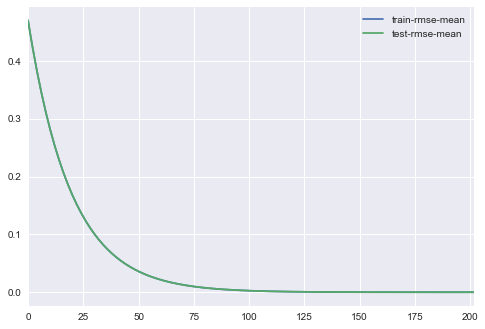

In [98]:
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()

In [99]:
y_predict = model.predict(dtest)
output = pd.DataFrame({'id': id_test, 'price_doc': y_predict})
output.head()

ValueError: feature_names mismatch: ['oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'ppi', 'gdp_deflator', 'balance_trade', 'balance_trade_growth', 'usdrub', 'eurrub', 'brent', 'net_capital_export', 'gdp_annual', 'gdp_annual_growth', 'average_provision_of_build_contract', 'average_provision_of_build_contract_moscow', 'rts', 'micex', 'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_value', 'deposits_growth', 'deposits_rate', 'mortgage_value', 'mortgage_growth', 'mortgage_rate', 'grp', 'grp_growth', 'income_per_cap', 'real_dispos_income_per_cap_growth', 'salary', 'salary_growth', 'fixed_basket', 'retail_trade_turnover', 'retail_trade_turnover_per_cap', 'retail_trade_turnover_growth', 'labor_force', 'unemployment', 'employment', 'invest_fixed_capital_per_cap', 'invest_fixed_assets', 'profitable_enterpr_share', 'unprofitable_enterpr_share', 'share_own_revenues', 'overdue_wages_per_cap', 'fin_res_per_cap', 'marriages_per_1000_cap', 'divorce_rate', 'construction_value', 'invest_fixed_assets_phys', 'pop_natural_increase', 'pop_migration', 'pop_total_inc', 'childbirth', 'mortality', 'housing_fund_sqm', 'lodging_sqm_per_cap', 'water_pipes_share', 'baths_share', 'sewerage_share', 'gas_share', 'hot_water_share', 'electric_stove_share', 'heating_share', 'old_house_share', 'average_life_exp', 'infant_mortarity_per_1000_cap', 'perinatal_mort_per_1000_cap', 'incidence_population', 'rent_price_4+room_bus', 'rent_price_3room_bus', 'rent_price_2room_bus', 'rent_price_1room_bus', 'rent_price_3room_eco', 'rent_price_2room_eco', 'rent_price_1room_eco', 'child_on_acc_pre_school', 'load_of_teachers_school_per_teacher', 'students_state_oneshift', 'modern_education_share', 'old_education_build_share', 'provision_doctors', 'provision_nurse', 'load_on_doctors', 'power_clinics', 'hospital_beds_available_per_cap', 'hospital_bed_occupancy_per_year', 'turnover_catering_per_cap', 'seats_theather_rfmin_per_100000_cap', 'bandwidth_sports', 'population_reg_sports_share', 'apartment_build', 'apartment_fund_sqm', 'full_sq', 'floor', 'product_type', 'sub_area', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_education_centers_raion', 'children_school', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995', 'ID_metro', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 'ID_railroad_station_walk', 'railroad_station_avto_km', 'railroad_station_avto_min', 'ID_railroad_station_avto', 'public_transport_station_km', 'public_transport_station_min_walk', 'water_km', 'water_1line', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km', 'big_road1_km', 'ID_big_road1', 'big_road1_1line', 'big_road2_km', 'ID_big_road2', 'railroad_km', 'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal', 'bus_terminal_avto_km', 'ID_bus_terminal', 'oil_chemistry_km', 'nuclear_reactor_km', 'radiation_km', 'power_transmission_line_km', 'thermal_power_plant_km', 'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km', 'basketball_km', 'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km', 'university_km', 'workplaces_km', 'shopping_centers_km', 'office_km', 'additional_education_km', 'preschool_km', 'big_church_km', 'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km', 'catering_km', 'ecology', 'green_part_500', 'prom_part_500', 'office_count_500', 'office_sqm_500', 'trc_count_500', 'trc_sqm_500', 'cafe_count_500', 'cafe_count_500_na_price', 'cafe_count_500_price_500', 'cafe_count_500_price_1000', 'cafe_count_500_price_1500', 'cafe_count_500_price_2500', 'cafe_count_500_price_4000', 'cafe_count_500_price_high', 'big_church_count_500', 'church_count_500', 'mosque_count_500', 'leisure_count_500', 'sport_count_500', 'market_count_500', 'green_part_1000', 'prom_part_1000', 'office_count_1000', 'office_sqm_1000', 'trc_count_1000', 'trc_sqm_1000', 'cafe_count_1000', 'cafe_count_1000_na_price', 'cafe_count_1000_price_500', 'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500', 'cafe_count_1000_price_2500', 'cafe_count_1000_price_4000', 'cafe_count_1000_price_high', 'big_church_count_1000', 'church_count_1000', 'mosque_count_1000', 'leisure_count_1000', 'sport_count_1000', 'market_count_1000', 'green_part_1500', 'prom_part_1500', 'office_count_1500', 'office_sqm_1500', 'trc_count_1500', 'trc_sqm_1500', 'cafe_count_1500', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500', 'cafe_count_1500_na_price', 'cafe_count_1500_price_500', 'cafe_count_1500_price_1000', 'cafe_count_1500_price_1500', 'cafe_count_1500_price_2500', 'cafe_count_1500_price_4000', 'cafe_count_1500_price_high', 'big_church_count_1500', 'church_count_1500', 'mosque_count_1500', 'leisure_count_1500', 'sport_count_1500', 'market_count_1500', 'green_part_2000', 'prom_part_2000', 'office_count_2000', 'office_sqm_2000', 'trc_count_2000', 'trc_sqm_2000', 'cafe_count_2000', 'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000', 'cafe_count_2000_na_price', 'cafe_count_2000_price_500', 'cafe_count_2000_price_1000', 'cafe_count_2000_price_1500', 'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000', 'cafe_count_2000_price_high', 'big_church_count_2000', 'church_count_2000', 'mosque_count_2000', 'leisure_count_2000', 'sport_count_2000', 'market_count_2000', 'green_part_3000', 'prom_part_3000', 'office_count_3000', 'office_sqm_3000', 'trc_count_3000', 'trc_sqm_3000', 'cafe_count_3000', 'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000', 'cafe_count_3000_na_price', 'cafe_count_3000_price_500', 'cafe_count_3000_price_1000', 'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500', 'cafe_count_3000_price_4000', 'cafe_count_3000_price_high', 'big_church_count_3000', 'church_count_3000', 'mosque_count_3000', 'leisure_count_3000', 'sport_count_3000', 'market_count_3000', 'green_part_5000', 'prom_part_5000', 'office_count_5000', 'office_sqm_5000', 'trc_count_5000', 'trc_sqm_5000', 'cafe_count_5000', 'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000', 'cafe_count_5000_na_price', 'cafe_count_5000_price_500', 'cafe_count_5000_price_1000', 'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000', 'cafe_count_5000_price_high', 'big_church_count_5000', 'church_count_5000', 'mosque_count_5000', 'leisure_count_5000', 'sport_count_5000', 'market_count_5000', 'price_log'] [u'full_sq', u'life_sq', u'floor', u'max_floor', u'material', u'build_year', u'num_room', u'kitch_sq', u'state', u'product_type', u'sub_area', u'area_m', u'raion_popul', u'green_zone_part', u'indust_part', u'children_preschool', u'preschool_quota', u'preschool_education_centers_raion', u'children_school', u'school_quota', u'school_education_centers_raion', u'school_education_centers_top_20_raion', u'hospital_beds_raion', u'healthcare_centers_raion', u'university_top_20_raion', u'sport_objects_raion', u'additional_education_raion', u'culture_objects_top_25', u'culture_objects_top_25_raion', u'shopping_centers_raion', u'office_raion', u'thermal_power_plant_raion', u'incineration_raion', u'oil_chemistry_raion', u'radiation_raion', u'railroad_terminal_raion', u'big_market_raion', u'nuclear_reactor_raion', u'detention_facility_raion', u'full_all', u'male_f', u'female_f', u'young_all', u'young_male', u'young_female', u'work_all', u'work_male', u'work_female', u'ekder_all', u'ekder_male', u'ekder_female', u'0_6_all', u'0_6_male', u'0_6_female', u'7_14_all', u'7_14_male', u'7_14_female', u'0_17_all', u'0_17_male', u'0_17_female', u'16_29_all', u'16_29_male', u'16_29_female', u'0_13_all', u'0_13_male', u'0_13_female', u'raion_build_count_with_material_info', u'build_count_block', u'build_count_wood', u'build_count_frame', u'build_count_brick', u'build_count_monolith', u'build_count_panel', u'build_count_foam', u'build_count_slag', u'build_count_mix', u'raion_build_count_with_builddate_info', u'build_count_before_1920', u'build_count_1921-1945', u'build_count_1946-1970', u'build_count_1971-1995', u'build_count_after_1995', u'ID_metro', u'metro_min_avto', u'metro_km_avto', u'metro_min_walk', u'metro_km_walk', u'kindergarten_km', u'school_km', u'park_km', u'green_zone_km', u'industrial_km', u'water_treatment_km', u'cemetery_km', u'incineration_km', u'railroad_station_walk_km', u'railroad_station_walk_min', u'ID_railroad_station_walk', u'railroad_station_avto_km', u'railroad_station_avto_min', u'ID_railroad_station_avto', u'public_transport_station_km', u'public_transport_station_min_walk', u'water_km', u'water_1line', u'mkad_km', u'ttk_km', u'sadovoe_km', u'bulvar_ring_km', u'kremlin_km', u'big_road1_km', u'ID_big_road1', u'big_road1_1line', u'big_road2_km', u'ID_big_road2', u'railroad_km', u'railroad_1line', u'zd_vokzaly_avto_km', u'ID_railroad_terminal', u'bus_terminal_avto_km', u'ID_bus_terminal', u'oil_chemistry_km', u'nuclear_reactor_km', u'radiation_km', u'power_transmission_line_km', u'thermal_power_plant_km', u'ts_km', u'big_market_km', u'market_shop_km', u'fitness_km', u'swim_pool_km', u'ice_rink_km', u'stadium_km', u'basketball_km', u'hospice_morgue_km', u'detention_facility_km', u'public_healthcare_km', u'university_km', u'workplaces_km', u'shopping_centers_km', u'office_km', u'additional_education_km', u'preschool_km', u'big_church_km', u'church_synagogue_km', u'mosque_km', u'theater_km', u'museum_km', u'exhibition_km', u'catering_km', u'ecology', u'green_part_500', u'prom_part_500', u'office_count_500', u'office_sqm_500', u'trc_count_500', u'trc_sqm_500', u'cafe_count_500', u'cafe_sum_500_min_price_avg', u'cafe_sum_500_max_price_avg', u'cafe_avg_price_500', u'cafe_count_500_na_price', u'cafe_count_500_price_500', u'cafe_count_500_price_1000', u'cafe_count_500_price_1500', u'cafe_count_500_price_2500', u'cafe_count_500_price_4000', u'cafe_count_500_price_high', u'big_church_count_500', u'church_count_500', u'mosque_count_500', u'leisure_count_500', u'sport_count_500', u'market_count_500', u'green_part_1000', u'prom_part_1000', u'office_count_1000', u'office_sqm_1000', u'trc_count_1000', u'trc_sqm_1000', u'cafe_count_1000', u'cafe_sum_1000_min_price_avg', u'cafe_sum_1000_max_price_avg', u'cafe_avg_price_1000', u'cafe_count_1000_na_price', u'cafe_count_1000_price_500', u'cafe_count_1000_price_1000', u'cafe_count_1000_price_1500', u'cafe_count_1000_price_2500', u'cafe_count_1000_price_4000', u'cafe_count_1000_price_high', u'big_church_count_1000', u'church_count_1000', u'mosque_count_1000', u'leisure_count_1000', u'sport_count_1000', u'market_count_1000', u'green_part_1500', u'prom_part_1500', u'office_count_1500', u'office_sqm_1500', u'trc_count_1500', u'trc_sqm_1500', u'cafe_count_1500', u'cafe_sum_1500_min_price_avg', u'cafe_sum_1500_max_price_avg', u'cafe_avg_price_1500', u'cafe_count_1500_na_price', u'cafe_count_1500_price_500', u'cafe_count_1500_price_1000', u'cafe_count_1500_price_1500', u'cafe_count_1500_price_2500', u'cafe_count_1500_price_4000', u'cafe_count_1500_price_high', u'big_church_count_1500', u'church_count_1500', u'mosque_count_1500', u'leisure_count_1500', u'sport_count_1500', u'market_count_1500', u'green_part_2000', u'prom_part_2000', u'office_count_2000', u'office_sqm_2000', u'trc_count_2000', u'trc_sqm_2000', u'cafe_count_2000', u'cafe_sum_2000_min_price_avg', u'cafe_sum_2000_max_price_avg', u'cafe_avg_price_2000', u'cafe_count_2000_na_price', u'cafe_count_2000_price_500', u'cafe_count_2000_price_1000', u'cafe_count_2000_price_1500', u'cafe_count_2000_price_2500', u'cafe_count_2000_price_4000', u'cafe_count_2000_price_high', u'big_church_count_2000', u'church_count_2000', u'mosque_count_2000', u'leisure_count_2000', u'sport_count_2000', u'market_count_2000', u'green_part_3000', u'prom_part_3000', u'office_count_3000', u'office_sqm_3000', u'trc_count_3000', u'trc_sqm_3000', u'cafe_count_3000', u'cafe_sum_3000_min_price_avg', u'cafe_sum_3000_max_price_avg', u'cafe_avg_price_3000', u'cafe_count_3000_na_price', u'cafe_count_3000_price_500', u'cafe_count_3000_price_1000', u'cafe_count_3000_price_1500', u'cafe_count_3000_price_2500', u'cafe_count_3000_price_4000', u'cafe_count_3000_price_high', u'big_church_count_3000', u'church_count_3000', u'mosque_count_3000', u'leisure_count_3000', u'sport_count_3000', u'market_count_3000', u'green_part_5000', u'prom_part_5000', u'office_count_5000', u'office_sqm_5000', u'trc_count_5000', u'trc_sqm_5000', u'cafe_count_5000', u'cafe_sum_5000_min_price_avg', u'cafe_sum_5000_max_price_avg', u'cafe_avg_price_5000', u'cafe_count_5000_na_price', u'cafe_count_5000_price_500', u'cafe_count_5000_price_1000', u'cafe_count_5000_price_1500', u'cafe_count_5000_price_2500', u'cafe_count_5000_price_4000', u'cafe_count_5000_price_high', u'big_church_count_5000', u'church_count_5000', u'mosque_count_5000', u'leisure_count_5000', u'sport_count_5000', u'market_count_5000']
expected micex_cbi_tr, unemployment, retail_trade_turnover, apartment_build, power_clinics, rts, pop_migration, provision_doctors, invest_fixed_assets, balance_trade, housing_fund_sqm, heating_share, mortality, deposits_rate, micex_rgbi_tr, gdp_annual_growth, usdrub, balance_trade_growth, deposits_value, deposits_growth, net_capital_export, bandwidth_sports, fixed_basket, infant_mortarity_per_1000_cap, divorce_rate, employment, mortgage_rate, child_on_acc_pre_school, profitable_enterpr_share, income_per_cap, load_of_teachers_school_per_teacher, rent_price_3room_eco, real_dispos_income_per_cap_growth, rent_price_4+room_bus, seats_theather_rfmin_per_100000_cap, childbirth, mortgage_growth, price_log, students_state_oneshift, grp_growth, mortgage_value, share_own_revenues, pop_natural_increase, retail_trade_turnover_growth, oil_urals, ppi, labor_force, hot_water_share, old_house_share, rent_price_2room_eco, water_pipes_share, pop_total_inc, unprofitable_enterpr_share, baths_share, hospital_beds_available_per_cap, overdue_wages_per_cap, rent_price_1room_bus, average_provision_of_build_contract, provision_nurse, gdp_quart_growth, salary_growth, gas_share, invest_fixed_assets_phys, gdp_quart, old_education_build_share, incidence_population, gdp_deflator, turnover_catering_per_cap, rent_price_2room_bus, construction_value, gdp_annual, grp, invest_fixed_capital_per_cap, lodging_sqm_per_cap, brent, population_reg_sports_share, rent_price_1room_eco, retail_trade_turnover_per_cap, hospital_bed_occupancy_per_year, sewerage_share, modern_education_share, eurrub, apartment_fund_sqm, electric_stove_share, perinatal_mort_per_1000_cap, salary, cpi, load_on_doctors, micex, rent_price_3room_bus, average_provision_of_build_contract_moscow, average_life_exp, marriages_per_1000_cap, fin_res_per_cap in input data
training data did not have the following fields: cafe_avg_price_500, build_year, hospital_beds_raion, school_quota, cafe_sum_1000_max_price_avg, material, max_floor, num_room, kitch_sq, state, cafe_sum_500_max_price_avg, cafe_sum_1000_min_price_avg, cafe_sum_500_min_price_avg, life_sq, preschool_quota, cafe_avg_price_1000